In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from data import *
from grid_search_clust import *
from vis import *

plt.rcParams['figure.figsize'] = (11, 7)
plt.rcParams['font.size'] = 20

# Clear data and add spectrum features

**Note:** each sample is a time series. Let us take the most important frequencies and their amplitudes and make features out of it

In [2]:
df = pd.read_pickle('df.pkl')
df = clear_data(df)
dist, exec_t = compute_dtw_distance_wells(df, False, False)

In [3]:
df = add_spectrum_features(df, 5)

In [4]:
df

,UWI,sp,x,y,signal_len,spect0,spect1,spect2,spect3,spect4,ampl0,ampl1,ampl2,ampl3,ampl4
0,well_21889,"[0.55285714, 0.5158285696, 0.4787999992, 0.441...",0,0,40,0.125000,0.100000,0.050000,0.025000,0.0,0.010021,0.017096,0.033772,0.036444,0.371314
1,well_21052,"[0.40714286, 0.40714286, 0.40714286, 0.4071428...",1,0,78,0.064103,0.051282,0.025641,0.012821,0.0,0.011687,0.011891,0.036728,0.052430,0.393341
2,well_21108,"[0.5128930786643355, 0.5256043462865803, 0.463...",2,0,48,0.083333,0.104167,0.041667,0.020833,0.0,0.022609,0.024700,0.036885,0.048975,0.421292
3,well_21583,"[0.5941460545447186, 0.49742460330502825, 0.43...",3,0,19,0.315789,0.157895,0.105263,0.052632,0.0,0.015299,0.040923,0.042975,0.101121,0.384947
4,well_21784,"[0.47609486299352666, 0.43773438875093557, 0.3...",4,0,87,0.068966,0.022989,0.034483,0.011494,0.0,0.018017,0.025711,0.029032,0.042322,0.306472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29224,well_31100,"[0.06628459015047174, 0.06628459015047174, 0.1...",24,146,178,0.033708,0.011236,0.016854,0.005618,0.0,0.010878,0.014487,0.031286,0.207042,0.451886
30210,well_31853,"[0.07386364, 0.07386364, 0.07386364, 0.0738636...",10,151,331,0.012085,0.006042,0.009063,0.003021,0.0,0.009683,0.014197,0.029640,0.230718,0.494636
31419,well_31547,"[0.07386364, 0.07386364, 0.07386364, 0.0738636...",19,157,322,0.006211,0.009317,0.012422,0.003106,0.0,0.028909,0.031177,0.031199,0.224961,0.465283
33820,well_31668,"[0.07386364, 0.07386364, 0.07386364, 0.0738636...",20,169,373,0.016086,0.005362,0.008043,0.002681,0.0,0.021455,0.029676,0.031372,0.215211,0.492113


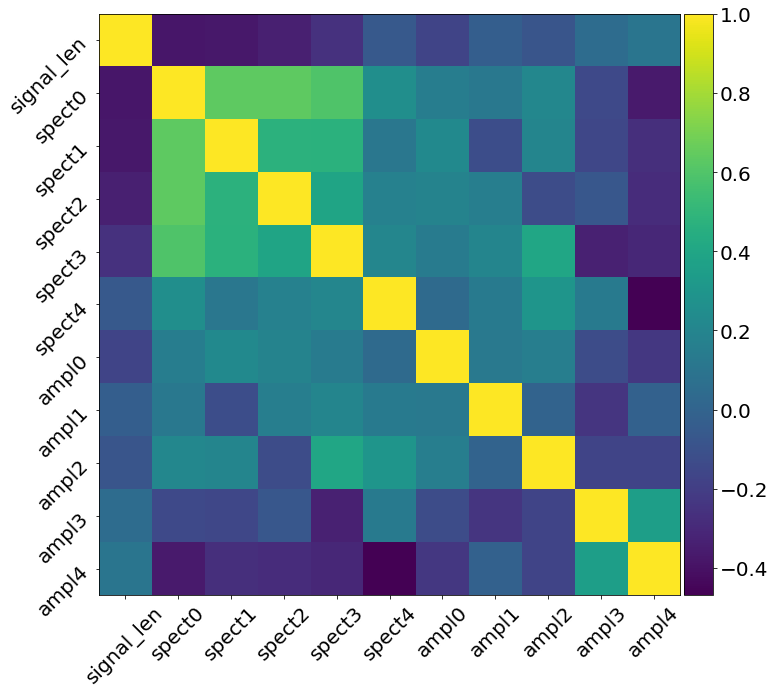

In [5]:
plot_corr_matrix(df, columns=['signal_len', 'spect0', 'spect1', 'spect2', 'spect3', 'spect4', 'ampl0', 'ampl1', 'ampl2', 'ampl3', 'ampl4'])

In [6]:
X = df.iloc[:, 4:].values

## Hyperparameters search

In [7]:
km_params_g = ParameterGrid({
    'n_clusters': [2, 3, 4, 5],
    'init': ['k-means++', 'random'],
    'algorithm': ['elkan', 'lloyd'],
    'tol': [1e-3, 1e-4, 1e-5],
    'random_state': [0, 11, 42],
    'n_init': ['auto']
})
gm_params_g = ParameterGrid({
    'n_components': [2, 3, 4, 5],
    'covariance_type': ['full', 'tied', 'diag'],
    'reg_covar': [1e-5, 1e-6, 1e-7],
    'tol': [1e-2, 1e-3, 1e-4],
    'init_params': ['kmeans', 'random'],
    'random_state': [0, 11, 42]
})
birch_params_g = ParameterGrid({
    'n_clusters': [2, 3, 4, 5],
    'threshold': [.4, .5, .6],
    'branching_factor': [40, 50, 60]
})
agg_clust_params_g = ParameterGrid({
    'n_clusters': [2, 3, 4, 5],
    'linkage': ['complete', 'average', 'single'],
    'metric': ['l1', 'l2', 'cosine']
})

models_ls = [KMeans, GaussianMixture, Birch, AgglomerativeClustering]
names_ls = ['KMeans', 'GaussianMixture', 'Birch', 'AgglomerativeClustering']
hyper_params_ls = [km_params_g, gm_params_g, birch_params_g, agg_clust_params_g]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

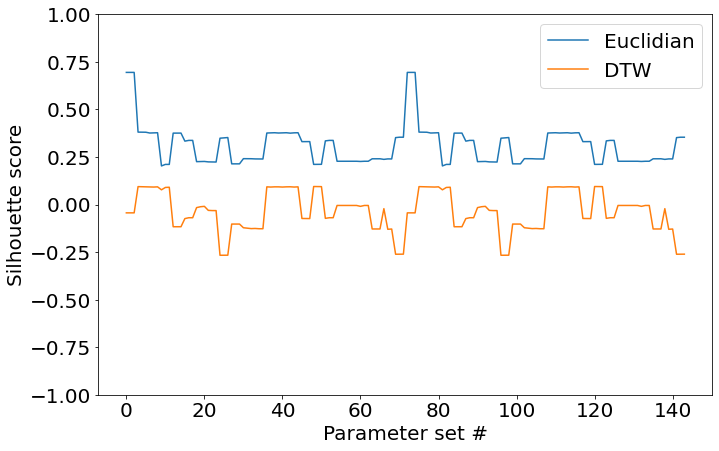

>> KMeans
>> Silhouette euclidian score = 0.69453
>> Silhouette dtw score = -0.04370


  0%|          | 0/648 [00:00<?, ?it/s]

/home/v_trofinov/anaconda3/lib/python3.9/site-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


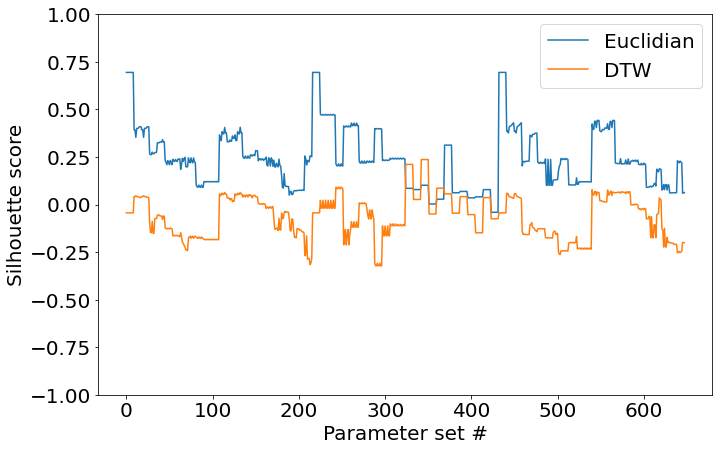

>> GaussianMixture
>> Silhouette euclidian score = 0.69453
>> Silhouette dtw score = -0.04370


  0%|          | 0/36 [00:00<?, ?it/s]

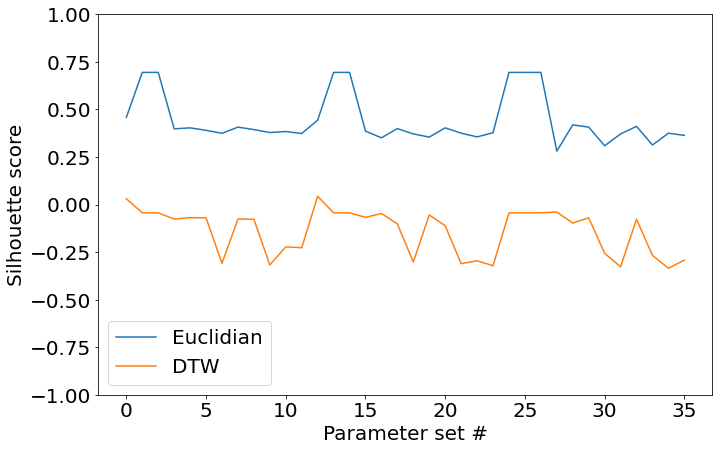

>> Birch
>> Silhouette euclidian score = 0.69453
>> Silhouette dtw score = -0.04370


  0%|          | 0/36 [00:00<?, ?it/s]

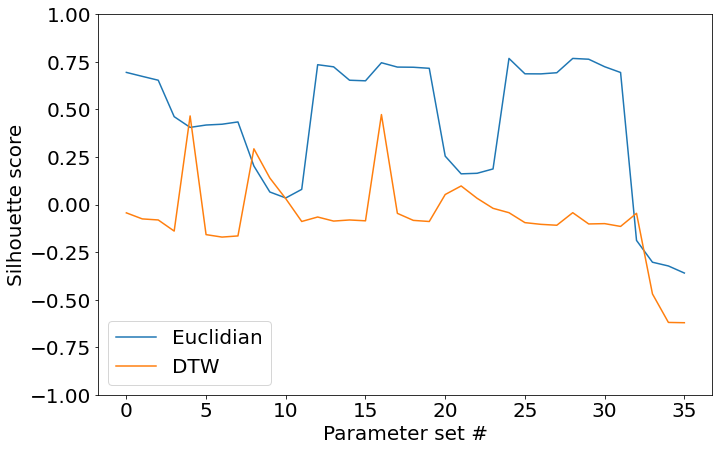

>> AgglomerativeClustering
>> Silhouette euclidian score = 0.76795
>> Silhouette dtw score = -0.04285


In [8]:
top_5_freq = np.arange(4, df.shape[1])
params_dict_5 = grid_search_run(df, dist, top_5_freq, models_ls, names_ls, hyper_params_ls, verbose=True)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

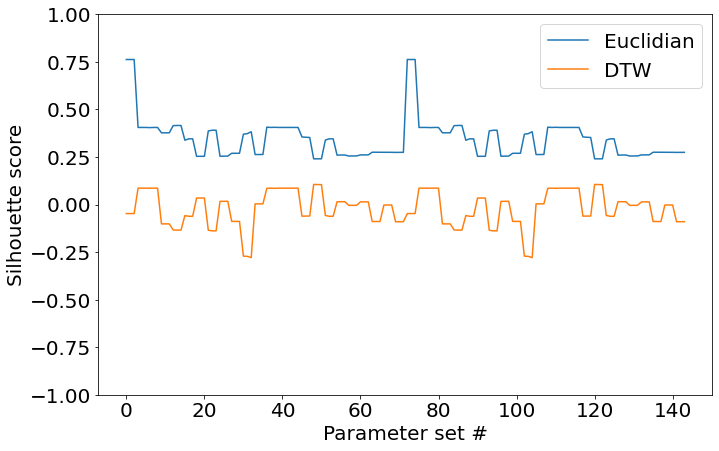

>> KMeans
>> Silhouette euclidian score = 0.76229
>> Silhouette dtw score = -0.04741


  0%|          | 0/648 [00:00<?, ?it/s]

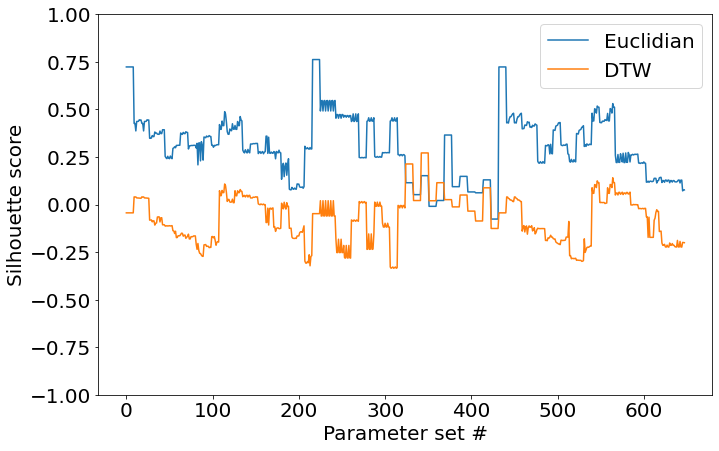

>> GaussianMixture
>> Silhouette euclidian score = 0.76208
>> Silhouette dtw score = -0.04788


  0%|          | 0/36 [00:00<?, ?it/s]

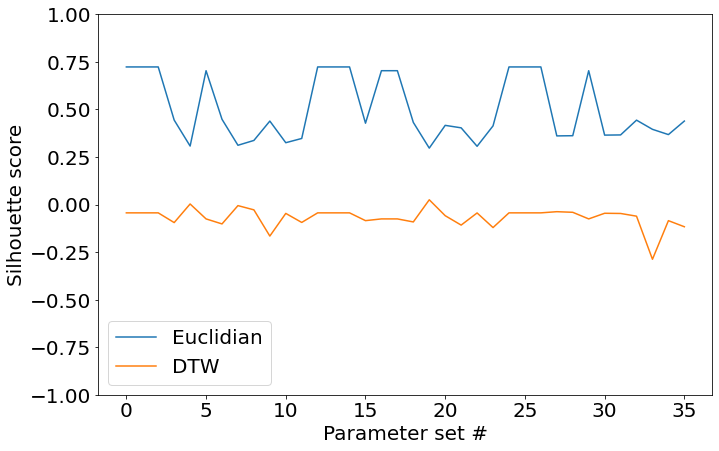

>> Birch
>> Silhouette euclidian score = 0.72321
>> Silhouette dtw score = -0.04370


  0%|          | 0/36 [00:00<?, ?it/s]

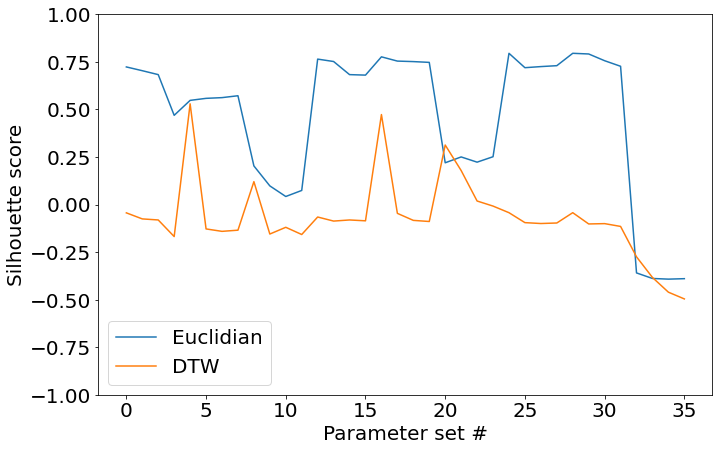

>> AgglomerativeClustering
>> Silhouette euclidian score = 0.79489
>> Silhouette dtw score = -0.04285


In [9]:
top_4_freq = [4, 6, 7, 8, 9, 11, 12, 13, 14]
params_dict_4 = grid_search_run(df, dist, top_4_freq, models_ls, names_ls, hyper_params_ls, verbose=True)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

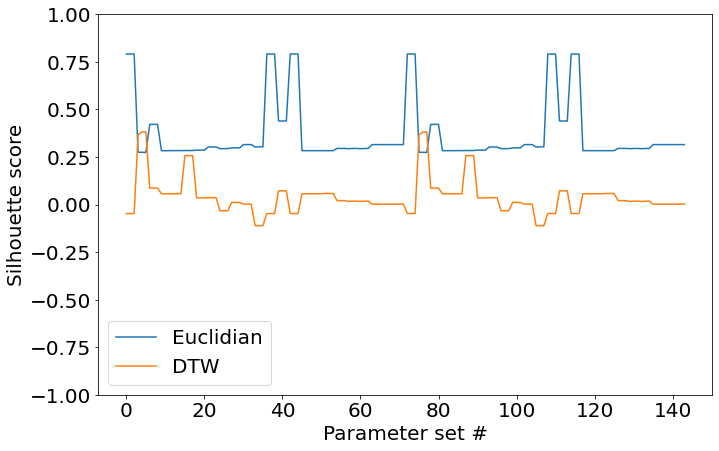

>> KMeans
>> Silhouette euclidian score = 0.79121
>> Silhouette dtw score = -0.04741


  0%|          | 0/648 [00:00<?, ?it/s]

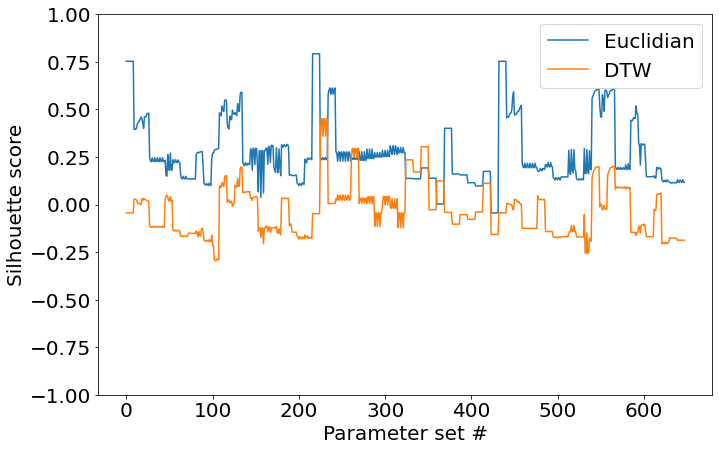

>> GaussianMixture
>> Silhouette euclidian score = 0.79241
>> Silhouette dtw score = -0.04788


  0%|          | 0/36 [00:00<?, ?it/s]

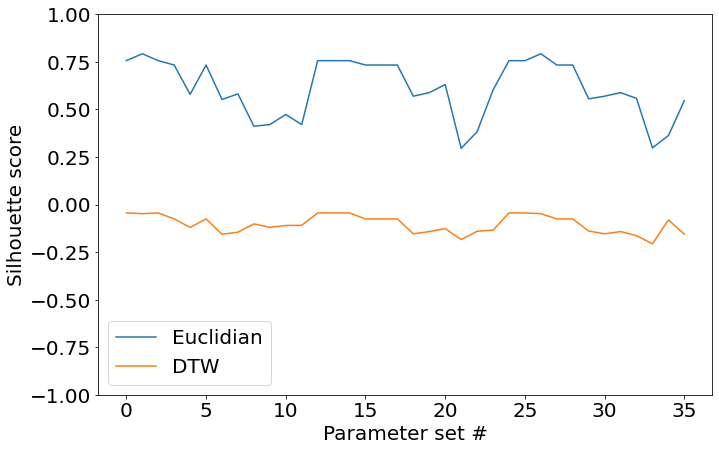

>> Birch
>> Silhouette euclidian score = 0.79241
>> Silhouette dtw score = -0.04788


  0%|          | 0/36 [00:00<?, ?it/s]

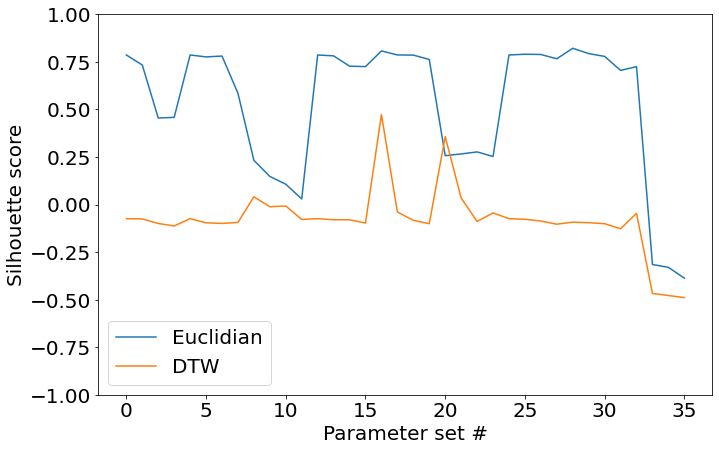

>> AgglomerativeClustering
>> Silhouette euclidian score = 0.82147
>> Silhouette dtw score = -0.09254


In [10]:
top_3_freq = [4, 7, 8, 9, 12, 13, 14]
params_dict_3 = grid_search_run(df, dist, top_3_freq, models_ls, names_ls, hyper_params_ls, verbose=True)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

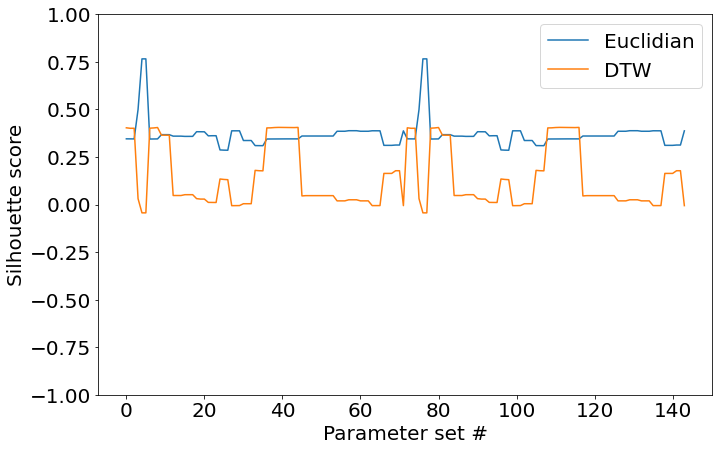

>> KMeans
>> Silhouette euclidian score = 0.76563
>> Silhouette dtw score = -0.04370


  0%|          | 0/648 [00:00<?, ?it/s]

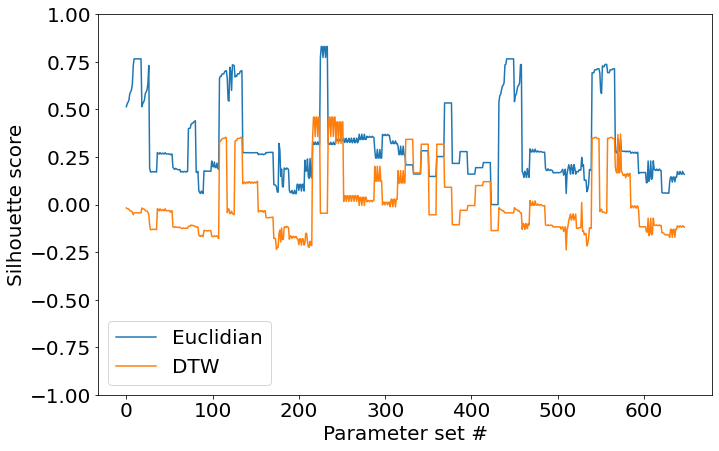

>> GaussianMixture
>> Silhouette euclidian score = 0.83046
>> Silhouette dtw score = -0.04554


  0%|          | 0/36 [00:00<?, ?it/s]

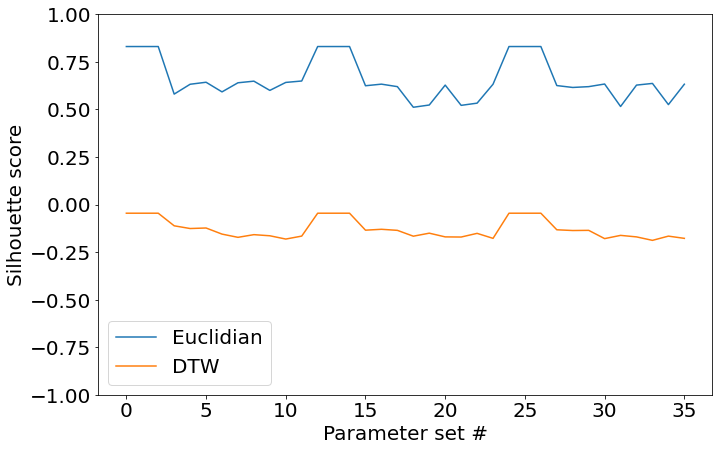

>> Birch
>> Silhouette euclidian score = 0.83046
>> Silhouette dtw score = -0.04554


  0%|          | 0/36 [00:00<?, ?it/s]

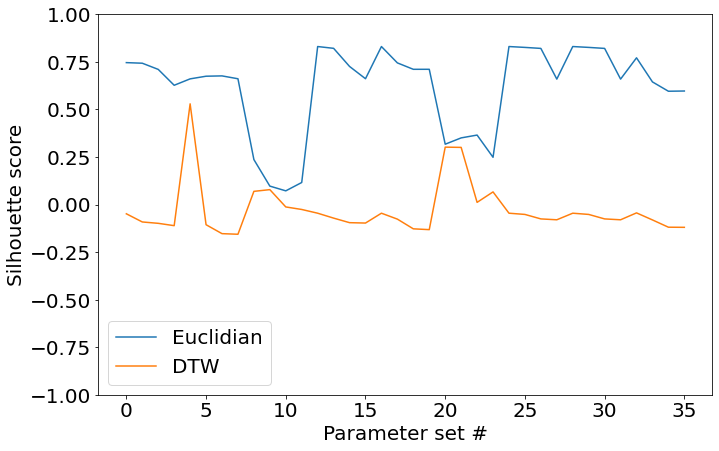

>> AgglomerativeClustering
>> Silhouette euclidian score = 0.83046
>> Silhouette dtw score = -0.04554


In [11]:
top_2_freq = [4, 8, 9, 13, 14]
params_dict_2 = grid_search_run(df, dist, top_2_freq, models_ls, names_ls, hyper_params_ls, verbose=True)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

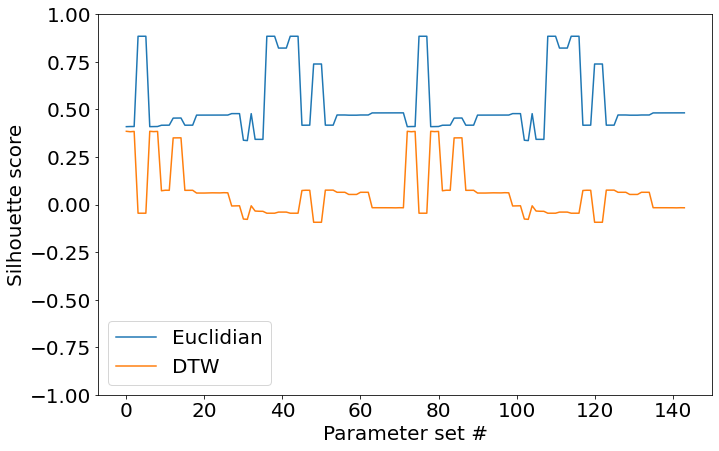

>> KMeans
>> Silhouette euclidian score = 0.88450
>> Silhouette dtw score = -0.04554


  0%|          | 0/648 [00:00<?, ?it/s]

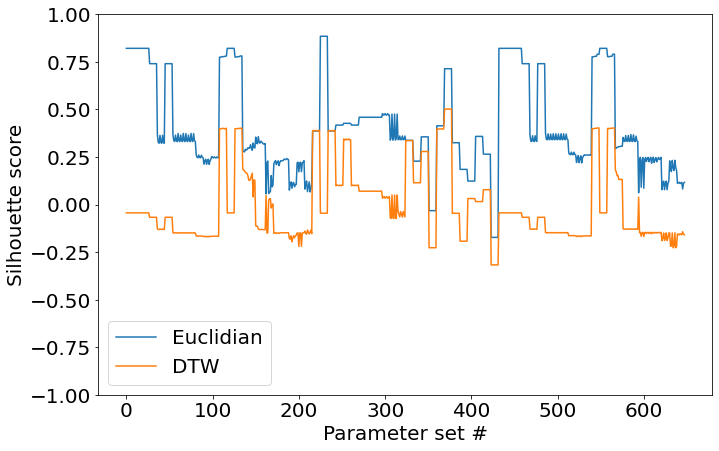

>> GaussianMixture
>> Silhouette euclidian score = 0.88450
>> Silhouette dtw score = -0.04554


  0%|          | 0/36 [00:00<?, ?it/s]

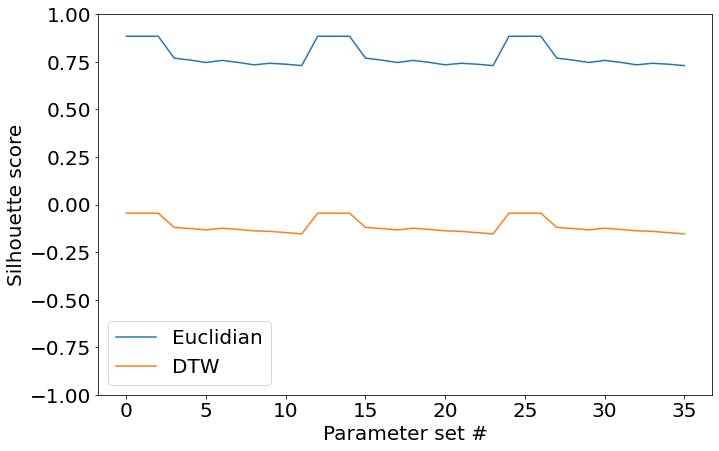

>> Birch
>> Silhouette euclidian score = 0.88450
>> Silhouette dtw score = -0.04554


  0%|          | 0/36 [00:00<?, ?it/s]

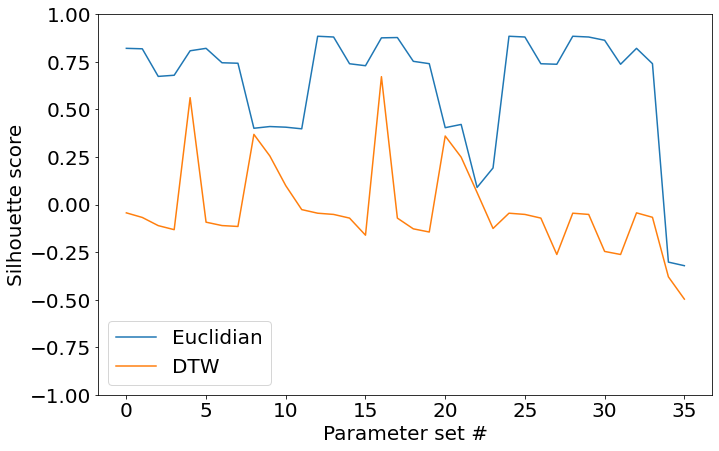

>> AgglomerativeClustering
>> Silhouette euclidian score = 0.88450
>> Silhouette dtw score = -0.04554


In [12]:
top_1_freq = [4, 9, 14]
params_dict_1 = grid_search_run(df, dist, top_1_freq, models_ls, names_ls, hyper_params_ls, verbose=True)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

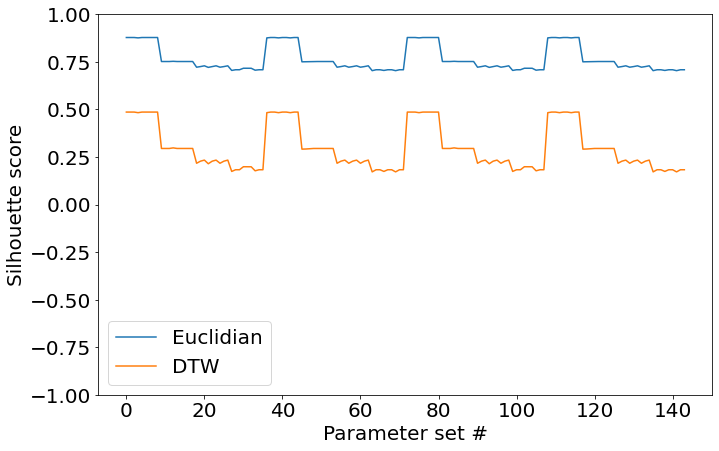

>> KMeans
>> Silhouette euclidian score = 0.87790
>> Silhouette dtw score = 0.48600


  0%|          | 0/648 [00:00<?, ?it/s]

/home/v_trofinov/anaconda3/lib/python3.9/site-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/home/v_trofinov/anaconda3/lib/python3.9/site-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/home/v_trofinov/anaconda3/lib/python3.9/site-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/home/v_trofinov/anaconda3/lib/python3.9/site-packages/sklearn/mixture/_base.py:274: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/home/v_trofinov/anacond

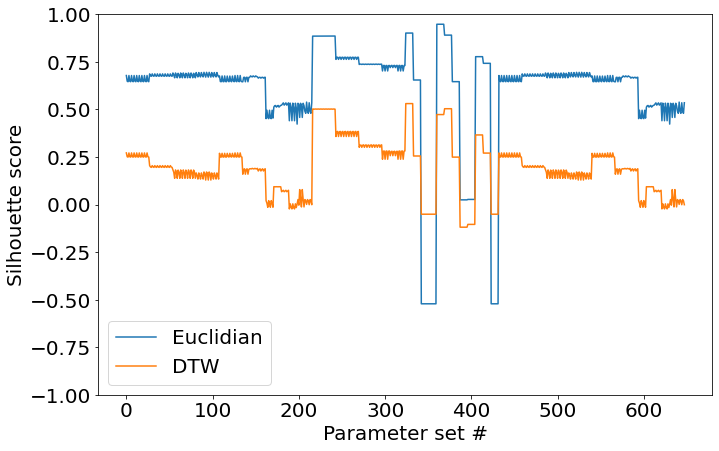

>> GaussianMixture
>> Silhouette euclidian score = 0.94765
>> Silhouette dtw score = 0.47290


  0%|          | 0/36 [00:00<?, ?it/s]

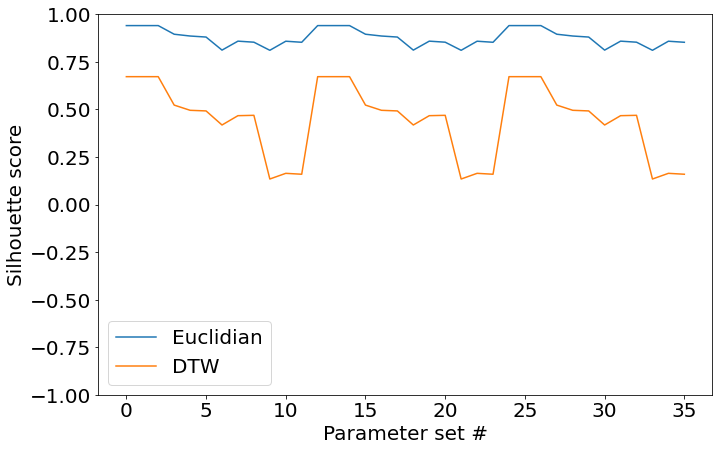

>> Birch
>> Silhouette euclidian score = 0.94053
>> Silhouette dtw score = 0.67207


  0%|          | 0/36 [00:00<?, ?it/s]

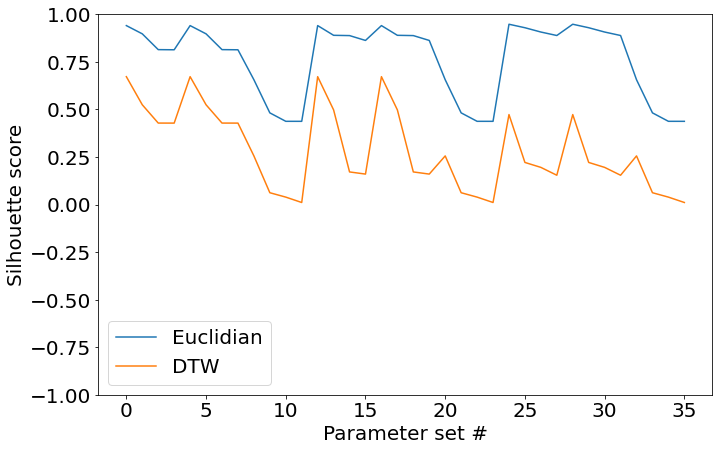

>> AgglomerativeClustering
>> Silhouette euclidian score = 0.94765
>> Silhouette dtw score = 0.47290


In [13]:
no_freq = [4]
params_dict_0 = grid_search_run(df, dist, no_freq, models_ls, names_ls, hyper_params_ls, verbose=True)

# Compare different models and parameter sets

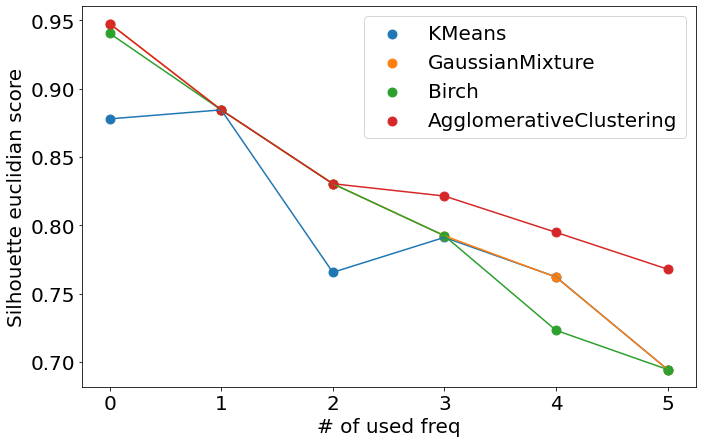

In [14]:
compare_models(names_ls, [params_dict_0, params_dict_1, params_dict_2, params_dict_3, params_dict_4, params_dict_5])

# Plot clusters of the best model

In [16]:
model = AgglomerativeClustering(**params_dict_0['AgglomerativeClustering'][-1])
df['clusters'] = model.fit_predict(df.iloc[:, no_freq].values)
print(df[['clusters']].value_counts())

clusters
0           2999
1              1
dtype: int64


In [17]:
model = AgglomerativeClustering(**params_dict_1['AgglomerativeClustering'][-1])
df['clusters'] = model.fit_predict(df.iloc[:, top_1_freq].values)
print(df[['clusters']].value_counts())

clusters
1           2981
0             19
dtype: int64


In [18]:
model = AgglomerativeClustering(**params_dict_2['AgglomerativeClustering'][-1])
df['clusters'] = model.fit_predict(df.iloc[:, top_2_freq].values)
print(df[['clusters']].value_counts())

clusters
1           2981
0             19
dtype: int64


In [19]:
model = AgglomerativeClustering(**params_dict_3['AgglomerativeClustering'][-1])
df['clusters'] = model.fit_predict(df.iloc[:, top_3_freq].values)
print(df[['clusters']].value_counts())

clusters
0           2999
1              1
dtype: int64


In [20]:
model = AgglomerativeClustering(**params_dict_4['AgglomerativeClustering'][-1])
df['clusters'] = model.fit_predict(df.iloc[:, top_4_freq].values)
print(df[['clusters']].value_counts())

clusters
0           2999
1              1
dtype: int64


In [21]:
model = AgglomerativeClustering(**params_dict_5['AgglomerativeClustering'][-1])
df['clusters'] = model.fit_predict(df.iloc[:, top_5_freq].values)
print(df[['clusters']].value_counts())

clusters
0           2999
1              1
dtype: int64


In [22]:
df.head()

,UWI,sp,x,y,signal_len,spect0,spect1,spect2,spect3,spect4,ampl0,ampl1,ampl2,ampl3,ampl4,clusters
0,well_21889,"[0.55285714, 0.5158285696, 0.4787999992, 0.441...",0,0,40,0.125000,0.100000,0.050000,0.025000,0.0,0.010021,0.017096,0.033772,0.036444,0.371314,0
1,well_21052,"[0.40714286, 0.40714286, 0.40714286, 0.4071428...",1,0,78,0.064103,0.051282,0.025641,0.012821,0.0,0.011687,0.011891,0.036728,0.052430,0.393341,0
2,well_21108,"[0.5128930786643355, 0.5256043462865803, 0.463...",2,0,48,0.083333,0.104167,0.041667,0.020833,0.0,0.022609,0.024700,0.036885,0.048975,0.421292,0
3,well_21583,"[0.5941460545447186, 0.49742460330502825, 0.43...",3,0,19,0.315789,0.157895,0.105263,0.052632,0.0,0.015299,0.040923,0.042975,0.101121,0.384947,0
4,well_21784,"[0.47609486299352666, 0.43773438875093557, 0.3...",4,0,87,0.068966,0.022989,0.034483,0.011494,0.0,0.018017,0.025711,0.029032,0.042322,0.306472,0
